#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [8]:
model2 = Sequential()
#卷積層1
model2.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model2.add(Dropout(rate=0.25))
model2.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層2與池化層2
model2.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model2.add(Dropout(0.25))
model2.add(MaxPooling2D(pool_size=(2, 2)))

#建立神經網路(平坦層、隱藏層、輸出層)
model2.add(Flatten())
model2.add(Dropout(rate=0.25))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(rate=0.25))
model2.add(Dense(10, activation='softmax'))
#檢查model 的STACK
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [9]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

# 訓練模型

In [11]:
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Epoch 1/12
293/293 [==============================] - 60s 203ms/step - loss: 0.0713 - accuracy: 0.4160 - val_loss: 0.0637 - val_accuracy: 0.5335
Epoch 2/12
293/293 [==============================] - 61s 207ms/step - loss: 0.0564 - accuracy: 0.5697 - val_loss: 0.0546 - val_accuracy: 0.6072
Epoch 3/12
293/293 [==============================] - 64s 217ms/step - loss: 0.0499 - accuracy: 0.6253 - val_loss: 0.0524 - val_accuracy: 0.6348
Epoch 4/12
293/293 [==============================] - 62s 213ms/step - loss: 0.0451 - accuracy: 0.6671 - val_loss: 0.0492 - val_accuracy: 0.6484
Epoch 5/12
293/293 [==============================] - 65s 223ms/step - loss: 0.0409 - accuracy: 0.7020 - val_loss: 0.0447 - val_accuracy: 0.6839
Epoch 6/12
293/293 [==============================] - 66s 224ms/step - loss: 0.0379 - accuracy: 0.7273 - val_loss: 0.0435 - val_accuracy: 0.7030
Epoch 7/12
293/293 [==============================] - 63s 216ms/step - loss: 0.0347 - accuracy: 0.7548 - val_loss: 0.0408 - val_ac

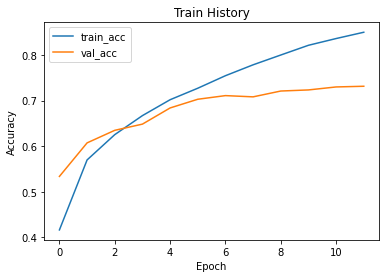

In [12]:
show_train_history('accuracy','val_accuracy')

In [14]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history=model2.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)  

Epoch 1/12
293/293 [==============================] - 61s 207ms/step - loss: 0.2469 - accuracy: 0.4273 - val_loss: 0.2270 - val_accuracy: 0.5359
Epoch 2/12
293/293 [==============================] - 61s 210ms/step - loss: 0.1932 - accuracy: 0.5719 - val_loss: 0.1998 - val_accuracy: 0.6113
Epoch 3/12
293/293 [==============================] - 61s 209ms/step - loss: 0.1733 - accuracy: 0.6278 - val_loss: 0.1795 - val_accuracy: 0.6489
Epoch 4/12
293/293 [==============================] - 61s 210ms/step - loss: 0.1587 - accuracy: 0.6636 - val_loss: 0.1809 - val_accuracy: 0.6452
Epoch 5/12
293/293 [==============================] - 64s 218ms/step - loss: 0.1458 - accuracy: 0.6952 - val_loss: 0.1543 - val_accuracy: 0.7018
Epoch 6/12
293/293 [==============================] - 62s 213ms/step - loss: 0.1357 - accuracy: 0.7213 - val_loss: 0.1507 - val_accuracy: 0.7082
Epoch 7/12
293/293 [==============================] - 63s 214ms/step - loss: 0.1261 - accuracy: 0.7445 - val_loss: 0.1416 - val_ac

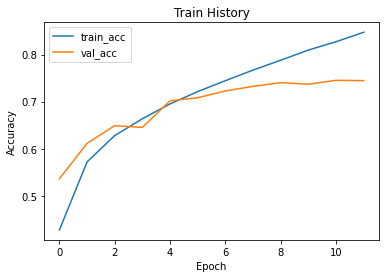

In [15]:
show_train_history('accuracy','val_accuracy')